https://flothesof.github.io/k-means-numpy.html

In [1]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [2]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

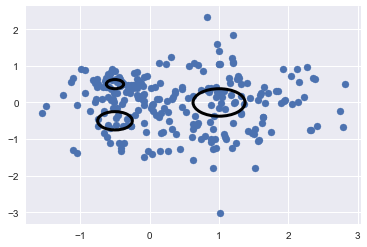

In [3]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

In [4]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [5]:
initialize_centroids(points, 3)

array([[-0.54686717,  0.62238805],
       [-0.31338184,  0.35989292],
       [ 0.91778614, -1.25728401]])

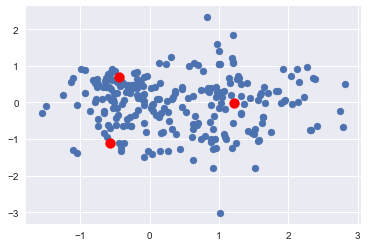

In [6]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [7]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [8]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2,
       1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
c

array([[-0.33909061,  0.27753241],
       [-0.11934827,  0.52598539],
       [ 0.63185267,  1.08515855]])

In [10]:
c_extended = c[: , np.newaxis, :]
c_extended

array([[[-0.33909061,  0.27753241]],

       [[-0.11934827,  0.52598539]],

       [[ 0.63185267,  1.08515855]]])

In [11]:
c_extended.shape

(3, 1, 2)

In [12]:
p = points[0]
p

array([2.04357197, 0.73060507])

In [13]:
c_extended - p

array([[[-2.38266258, -0.45307266]],

       [[-2.16292024, -0.20461968]],

       [[-1.41171931,  0.35455348]]])

In [14]:
(c_extended - p).shape

(3, 1, 2)

In [15]:
points[:4] - c_extended

array([[[ 2.38266258,  0.45307266],
        [ 2.56489482, -0.12381006],
        [ 0.4669193 ,  0.79776821],
        [ 0.65848181, -0.17093231]],

       [[ 2.16292024,  0.20461968],
        [ 2.34515248, -0.37226305],
        [ 0.24717696,  0.54931523],
        [ 0.43873947, -0.4193853 ]],

       [[ 1.41171931, -0.35455348],
        [ 1.59395155, -0.9314362 ],
        [-0.50402397, -0.00985793],
        [-0.31246146, -0.97855845]]])

In [16]:
np.sqrt(((points[:4] - c_extended)**2).sum(axis=2))

array([[2.42535684, 2.5678813 , 0.92436343, 0.68030592],
       [2.17257754, 2.37451467, 0.60236507, 0.60694015],
       [1.4555616 , 1.84614597, 0.50412036, 1.02723357]])

In [17]:
np.argmin(np.sqrt(((points[:4] - c_extended)**2).sum(axis=2)), axis=0)

array([2, 2, 2, 1], dtype=int64)

In [18]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [19]:
move_centroids(points, closest_centroid(points, c), c)

array([[-0.17415255, -0.34162245],
       [ 0.19430057,  0.25621295],
       [ 1.42101491,  0.37193377]])

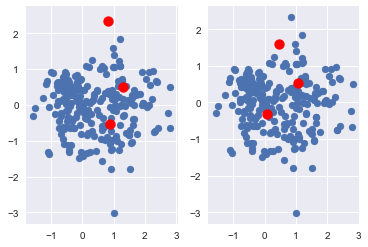

In [20]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [21]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 3)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=200, blit=True)

Traceback (most recent call last):
  File "C:\Users\blue_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\blue_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\blue_\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _start
    self._init_draw()
  File "C:\Users\blue_\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1756, in _init_draw
    raise RuntimeError('The init_func must return a '
RuntimeError: The init_func must return a sequence of Artist objects.


RuntimeError: The init_func must return a sequence of Artist objects.